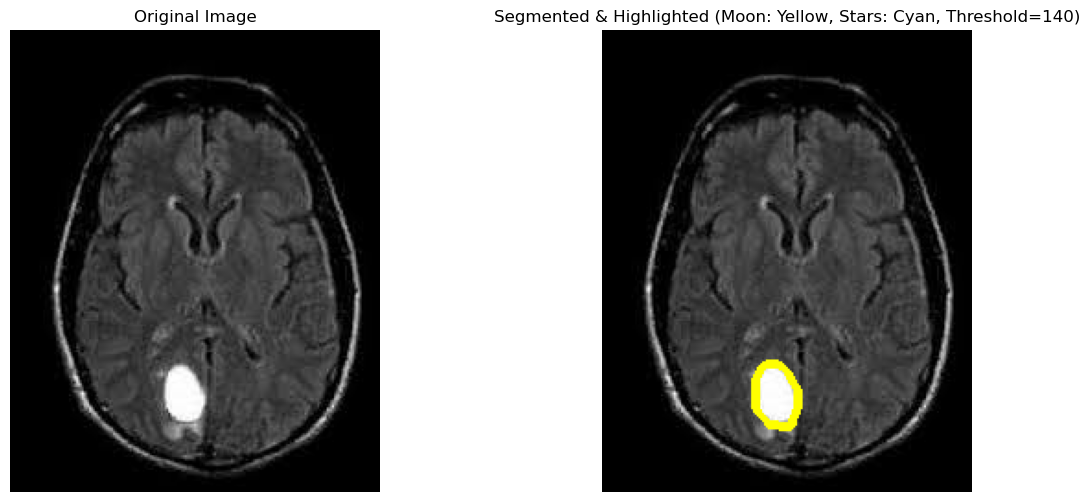

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_bright_part(image_path, threshold_value=100):
    # Load image and convert to grayscale
    img = cv2.imread(image_path)
    if img is None:
        print(f"Could not read image: {image_path}")
        return
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply a median blur to reduce noise
    blurred = cv2.medianBlur(gray, 5)
    
    # Threshold for bright objects
    _, thresh = cv2.threshold(blurred, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Morphological operations to remove small noise and connect close components
    kernel = np.ones((3,3), np.uint8)
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    clean = cv2.dilate(clean, kernel, iterations=1)
    
    # Find contours
    contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Create mask for 
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, contours, -1, 255, -1)
    

    output = img.copy()
    if contours:
        areas = [cv2.contourArea(cnt) for cnt in contours]
        for i, cnt in enumerate(contours):
            if areas[i] > 2:  # Stars (draw with cyan)
                cv2.drawContours(output, [cnt], -1, (0, 255, 255), 3)

    
    # Show results
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title(f"Segmented & Highlighted (Moon: Yellow, Stars: Cyan, Threshold={threshold_value})")
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage:
segment_bright_part(rf"C:\Users\Wahaj Sajid\Desktop\tumor.jpg", threshold_value = 140)